In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

## Scatterplot TERT promoter mutations

In [3]:
somatic_maf_df = pd.read_table(somatic_maf_file)

/tmp/ipykernel_366235/2010110460.py:1: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  somatic_maf_df = pd.read_table(somatic_maf_file)


In [ ]:
mutations_in_tert_promoter = somatic_maf_df[(somatic_maf_df['CHROM'] == 'chr5') &
                                                (somatic_maf_df['POS'] >= 1294942) &
                                                (somatic_maf_df['POS'] <= 1295289) &
                                                (somatic_maf_df['canonical_Protein_affecting'] == 'protein_affecting')
                                        ].copy()
mutations_in_tert_promoter = mutations_in_tert_promoter[["SAMPLE_ID", "VAF_AM", "MUT_ID"]]
summary_TERTp_mutations = mutations_in_tert_promoter.groupby(by = "SAMPLE_ID").agg({"MUT_ID" : len, "VAF_AM" : max}).reset_index()z



/tmp/ipykernel_366235/3109755309.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  summary_TERTp_mutations = mutations_in_tert_promoter.groupby(by = "SAMPLE_ID").agg({"MUT_ID" : len, "VAF_AM" : max}).reset_index()


In [5]:
full_cohort_metadata = pd.read_table(clinvars_file)

In [6]:
annotated_summary_TERTp_mutations = summary_TERTp_mutations.merge(full_cohort_metadata[["SAMPLE_ID", "AGE", "SEX", "HISTORY_OF_SMOKING"]], on = 'SAMPLE_ID')
annotated_summary_TERTp_mutations.head()

,SAMPLE_ID,number_pTERT_muts,max_VAF_AM_pTERT_muts,AGE,SEX,HISTORY_OF_SMOKING
0,P19_0005_BDO_01,1,0.001274,72,F,no
1,P19_0007_BDO_01,1,0.002107,67,M,yes
2,P19_0007_BTR_01,2,0.002067,67,M,yes
3,P19_0008_BDO_01,1,0.000679,72,M,yes
4,P19_0008_BTR_01,2,0.001170,72,M,yes


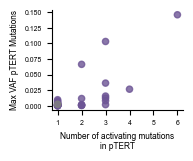

In [7]:
df = annotated_summary_TERTp_mutations

# Determine color based on conditions
df['color'] = df.apply(
    lambda row: '#6D5595' if row['HISTORY_OF_SMOKING'] == 'yes' and row['AGE'] > 55 else 'grey',
    axis=1
)

# Plot
plt.figure(figsize=(1.7,1.3))
plt.scatter(
    df['number_pTERT_muts'],
    df['max_VAF_AM_pTERT_muts'],
    c=df['color'],
    marker='o',
    s=20,  # bigger dots
    alpha = 0.8
)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Number of activating mutations\nin pTERT')
plt.ylabel('Max VAF pTERT Mutations')

plt.savefig("plot/ExtendedFig8b_scatterplot.pdf", bbox_inches = 'tight', dpi = 300)
plt.show()

In [8]:
mutations_in_tert_promoter

,SAMPLE_ID,VAF_AM,MUT_ID
42651,P19_0011_BDO_01,0.000363,chr5:1294948_CAG>C
42662,P19_0015_BDO_01,0.005927,chr5:1295018_C>T
42664,P19_0048_BTR_01,0.003052,chr5:1295034_C>A
42665,P19_0009_BTR_01,0.000475,chr5:1295034_C>A
42666,P19_0009_BDO_01,0.000641,chr5:1295034_C>A
42668,P19_0009_BTR_01,0.009542,chr5:1295043_G>T
42669,P19_0015_BTR_01,0.000263,chr5:1295043_G>T
42670,P19_0029_BTR_01,0.000800,chr5:1295043_G>T
42671,P19_0009_BDO_01,0.012616,chr5:1295043_G>T
42672,P19_0009_BTR_01,0.001227,chr5:1295046_T>G
